# Imports

In [61]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import plotly.express as px

### Grabbing the CSV data

In [62]:
player_data = pd.read_csv("player_data.csv", index_col="Player")

print(player_data.head())


                    Team Pos  Tgt  Rec   Yds   Y/R  TD  R/G    Y/G  Ctch%  \
Player                                                                      
Trey McBride         ARI  TE  118   88   879  10.0   8  7.3   73.3   74.6   
Ja'Marr Chase        CIN  WR  131   86   971  11.3   5  7.8   88.3   65.6   
Puka Nacua           LAR  WR  107   86  1019  11.8   4  7.8   92.6   80.4   
Christian McCaffrey  SFO  RB  107   85   806   9.5   5  6.5   62.0   79.4   
Jaxon Smith-Njigba   SEA  WR  111   82  1336  16.3   7  6.8  111.3   73.9   

                     Y/Tgt  Fmb     -9999  
Player                                     
Trey McBride           7.4    0  McBrTr01  
Ja'Marr Chase          7.4    1  ChasJa00  
Puka Nacua             9.5    1  NacuPu00  
Christian McCaffrey    7.5    2  McCaCh01  
Jaxon Smith-Njigba    12.0    2  SmitJa06  


### Clean CSV to only have WRs

In [63]:
print("Filtering out non-WRs\n")
wide_receivers = player_data[player_data["Pos"] == "WR"]
print(wide_receivers.head())

print("----------------------------------------------------------------------------")
print("Filtering out non-numeric columns\n")
wide_receivers = wide_receivers.select_dtypes(include=[np.number])
print(wide_receivers.head())

#Get the columns of the data
X = wide_receivers.values

imp = SimpleImputer(strategy='constant', fill_value=0)
X_clean = imp.fit_transform(X)

Filtering out non-WRs

                   Team Pos  Tgt  Rec   Yds   Y/R  TD  R/G    Y/G  Ctch%  \
Player                                                                     
Ja'Marr Chase       CIN  WR  131   86   971  11.3   5  7.8   88.3   65.6   
Puka Nacua          LAR  WR  107   86  1019  11.8   4  7.8   92.6   80.4   
Jaxon Smith-Njigba  SEA  WR  111   82  1336  16.3   7  6.8  111.3   73.9   
Amon-Ra St. Brown   DET  WR  108   75   884  11.8   9  6.3   73.7   69.4   
Chris Olave         NOR  WR  115   73   781  10.7   5  6.1   65.1   63.5   

                    Y/Tgt  Fmb     -9999  
Player                                    
Ja'Marr Chase         7.4    1  ChasJa00  
Puka Nacua            9.5    1  NacuPu00  
Jaxon Smith-Njigba   12.0    2  SmitJa06  
Amon-Ra St. Brown     8.2    1  StxxAm00  
Chris Olave           6.8    0  OlavCh00  
----------------------------------------------------------------------------
Filtering out non-numeric columns

                    Tgt  Rec   

### K-Means

In [64]:
inertias = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clean)
    inertias.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul

/Library/Frameworks/Pyth

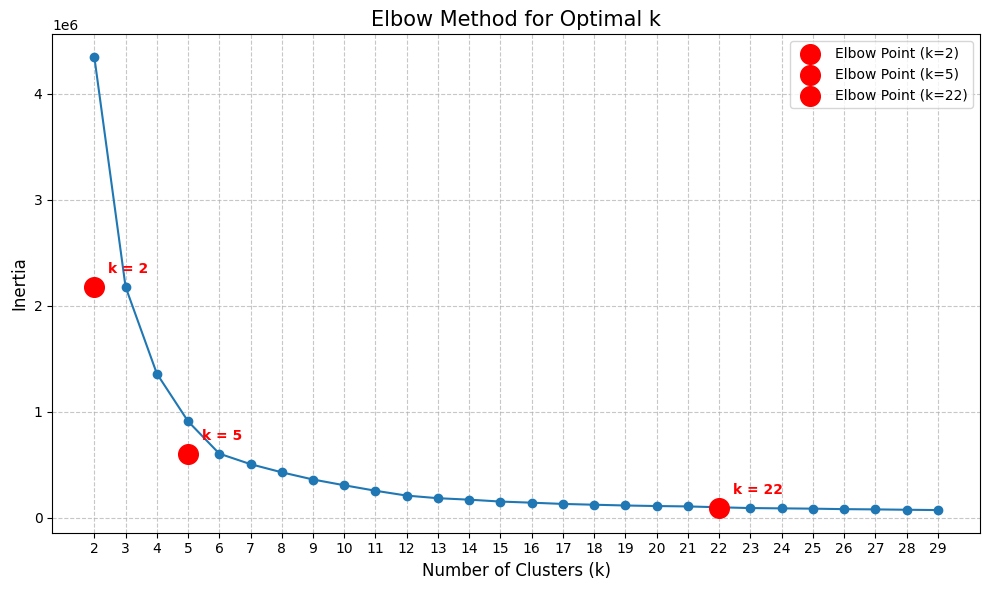

In [65]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 30), inertias, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=15)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(range(2, 30))
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate the elbow point
elbow_point = None
for i in range(1, len(inertias) - 1):
    # Calculate the angle of the elbow
    angle_change = (inertias[i-1] - inertias[i]) / (inertias[i] - inertias[i+1])
    if angle_change > 2:  # Adjust this threshold as needed
        elbow_point = i + 1
        plt.scatter(elbow_point, inertias[elbow_point-1], color='red', s=200, 
                    label=f'Elbow Point (k={elbow_point})', zorder=5)
        plt.annotate(f'k = {elbow_point}', 
                     xy=(elbow_point, inertias[elbow_point-1]), 
                     xytext=(10, 10), textcoords='offset points', 
                     fontweight='bold', color='red')

plt.legend()
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul



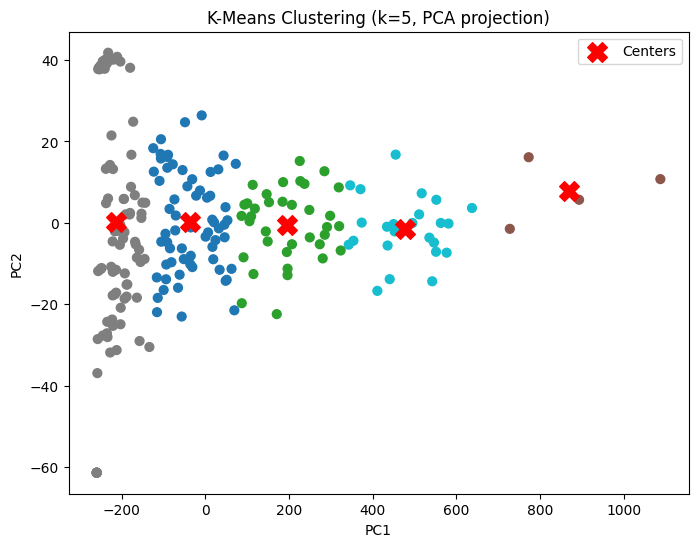

In [66]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_clean)  # use your processed (non-NaN) data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=40)
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:,0], 
    pca.transform(kmeans.cluster_centers_)[:,1], 
    c='red', marker='X', s=200, label='Centers'
)
plt.title("K-Means Clustering (k=5, PCA projection)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()
plt.show()

In [67]:
df_clusters = wide_receivers.copy()
df_clusters['Cluster'] = clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

df_clusters['PC1'] = X_pca[:, 0]
df_clusters['PC2'] = X_pca[:, 1]

fig = px.scatter(
    df_clusters, x="PC1", y="PC2", color="Cluster",
    hover_name=wide_receivers.index, opacity=0.6,
    title="KMeans Clusters with Example Players Labeled"
)

fig.show()
fig.write_html('kmeans_clusters.html')

In [68]:
df_clusters = wide_receivers.copy()
df_clusters['Cluster'] = clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

df_clusters['PC1'] = X_pca[:, 0]
df_clusters['PC2'] = X_pca[:, 1]


n_show = 2
samples = []
for cluster in df_clusters['Cluster'].unique():
    cluster_players = df_clusters[df_clusters['Cluster'] == cluster]
    chosen = cluster_players.head(n_show)
    samples.append(chosen)
highlight_df = pd.concat(samples)

fig = px.scatter(
    df_clusters, x="PC1", y="PC2", color="Cluster",
    hover_name=wide_receivers.index, opacity=0.6,
    title="KMeans Clusters with Example Players Labeled"
)
for _, row in highlight_df.iterrows():
    fig.add_annotation(
        x=row['PC1'],
        y=row['PC2'],
        text=row.name,
        showarrow=True, arrowhead=1,
        ax=20, ay=-20,
        font=dict(color="black", size=12)
    )
fig.show()